# Olist Customer Segmentation using K-means clustering 
#### This project uses K-means to segment customers based on their location to assist the marketing team to make decisions determined by the data analysis deduced. The choice of numbers of cluster was made using many using evaluation metrics that will help us achieve a better understanding of our customers.

## 1. Business Understanding
In this section, We will discuss about olist as a businees company and know their target customers to better understand and determine the goals to be achieved

### 1.1 Project description
Olist is a Brazilian e-commerce founded in 2015 platform that operates as a marketplace connecting businesses to an online store, to allow sellers to place their products on the market and reach an expanded customer base.
The platform is known for its focus on enabling smaller businesses to stand out in the competitive e-commerce landscape by providing tools and services that simplify the selling process. Olist has become one of the most improving players in the e-commerce industry.
However, Olist has a diverse customer base with varying preferences, behaviors, and needs. The company currently lacks a granular understanding of its customer segments, making it difficult to tailor marketing efforts, product recommendations, and customer service to individual customer needs. As a result, Olist faces several operational and marketing challenges.
By addressing this business problem through improved customer segmentation, Olist can enhance its competitive position and provide a superior shopping experience to its customers, ultimately driving higher revenue and profitability in the Brazilian e-commerce market.

### 1.2 Project objectives
With the substantial growth of Olist in the competitive E-commerce landscape, the need to identify its users has become vital to keep up with its competitors.
To continue with the rising trajectory of Olist and assisting its users to find their needs, Olist needs to determine its users preferences, behaviour and pattern based on its collected data to be able to provide personalized product recommendations.
Utilizing the features provided, We can segment customers based on location to provide a better customized experience and determine the most purchased and least purchased products, determine number of customers in each cluster and help the <b>Marketing team</b> make a decision that will help Olist's growth and customer satisfaction.
To conclude this section, the goals of the project are:
* Segment customers based on location to provide a customized experience and recommend them tailored products.
* Identify weak categories that have extremely low purchase rate and make the marketing team take a decision.
* Optimize product distribution for the sellers to move to for less time delays of delivery.
#### while the third goal may not be a recommendation for a marketing team, it will also be achieved directly through our interpretation of the two former goals.

## 2. Data Understanding
In this section, we will discuss the dataframes provided by Olist and utilize it to reach our goals. 

### 2.1. Importing data
To be able to interpret the data we need to first understand it by knowing its type (nominal or ordinal) and identify its 
The following Olist data was provided from <a href='https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce'>kaggle.com</a>
which is a popular online platform for data science competitions, machine learning projects, and data analytics.
We will also have to import pandas library because it simplifies work done on dataframe.
We will be importing all the dataframes.

In [1]:
import pandas as pd
customers=pd.read_csv("../Data/customers.csv")
geo=pd.read_csv("../Data/geolocation.csv")
items=pd.read_csv("../Data/orderItems.csv")
payments=pd.read_csv("../Data/payment.csv")
reviews=pd.read_csv("../Data/orderReviews.csv")
orders=pd.read_csv("../Data/orders.csv")
products=pd.read_csv("../Data/products.csv")
sellers=pd.read_csv("../Data/sellers.csv")
customers.head(1)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [2]:
items.head(1)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [3]:
payments.head(1)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [4]:
reviews.head(1)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [5]:
orders.head(1)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [6]:
sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [7]:
products.head(1)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [8]:
geo.head(1)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


### 2.2. Data exploration
Olist has provided 9 Datasets publicly to be analysed and conclude ways to improve its targeted user recommendation.
Each dataset will be briefly discussed.
#### Customers Dataset
this dataset contains information about the customers such as orders, location and zip code which will help us classify users based on location.
#### Geolocation Datalist
The geolocation dataset contains the location of Olist users with latitude and logitutde values. This may cause security concerns, however Olist has already taken into account users' safety and removed the total user zipcode and added only kept a prefix.
#### Order Items Datalist
This datalist contains details of orders users and the prices of the order
and can be traced to its user using order_id.
#### Order Payment Datalist
Order payments contains details of how orders are paid and the method of payment.
#### Order Reviews Datalist
The order reviews datalist contains comments and ratings given by users and the date of review.
#### Order Datalist
Contains general information on the order such as date of request and the items
#### Products Datalist
Products datalist delivers information on the products datalist such as weight,size and its category
#### Sellers Datalist
The sellers datalist provide information on the sellers of the products
#### Category Name Translation Datalist
Because Olist is a brazilian e-commerce company, it provides its category details in brazilian, however, Olist has provided a translation for all its categories in this datalist.</br>

<a href="https://i.imgur.com/HRhd2Y0.png">Data Schema</a>

<div style='color:red'>the previous image is a Data schema provided by olist to better understand the relations of each dataset</div>


## 3. Data preparation and pre-processing
In this section, we will be cleaning, dropping null values and merging dataframes, to be able to cluster the data.

### 3.1. Data cleaning

In [9]:
columns_to_keep = ['geolocation_lat', 'geolocation_lng','geolocation_zip_code_prefix']
columns_to_cluster= ['geolocation_lat','geolocation_lng']
print('Number of columns before removing duplicates',len(geo[columns_to_keep]))
geo = geo.drop_duplicates(subset=['geolocation_lat','geolocation_lng'], keep='first')
# Drop columns except 'geolocationlat' and 'geolocationlng'
geo = geo[columns_to_keep]
print(geo)

Number of columns before removing duplicates 1000163
         geolocation_lat  geolocation_lng  geolocation_zip_code_prefix
0             -23.545621       -46.639292                         1037
1             -23.546081       -46.644820                         1046
2             -23.546129       -46.642951                         1046
3             -23.544392       -46.639499                         1041
4             -23.541578       -46.641607                         1035
...                  ...              ...                          ...
1000155       -28.180655       -52.034367                        99965
1000156       -28.072188       -52.011272                        99950
1000157       -28.068864       -52.012964                        99950
1000158       -28.068639       -52.010705                        99950
1000161       -28.388932       -51.846871                        99980

[718463 rows x 3 columns]


### 3.2. Data visualization

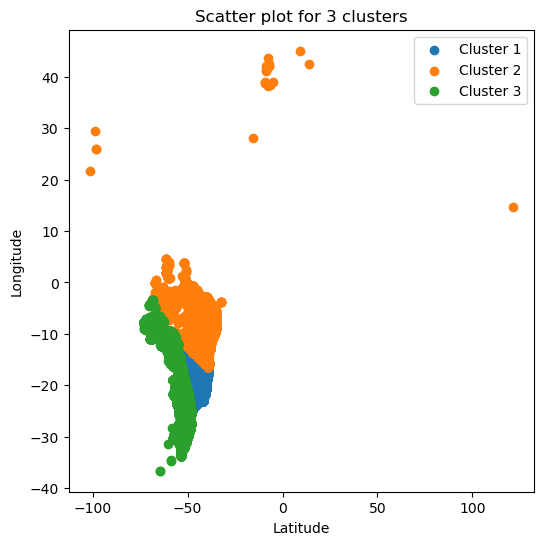

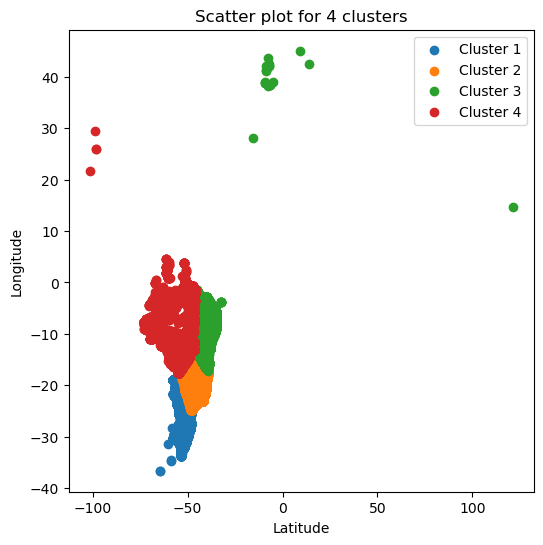

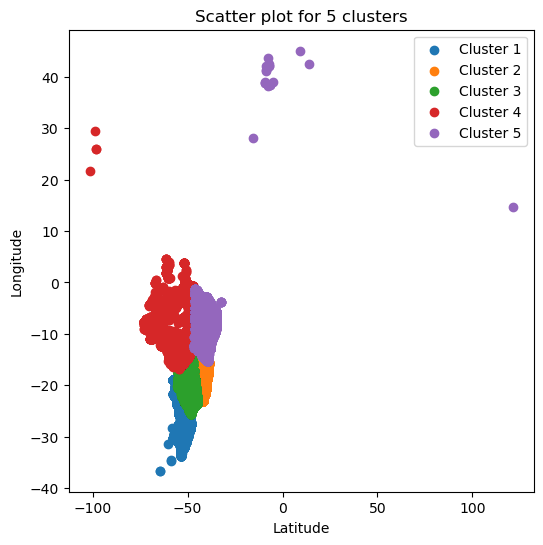

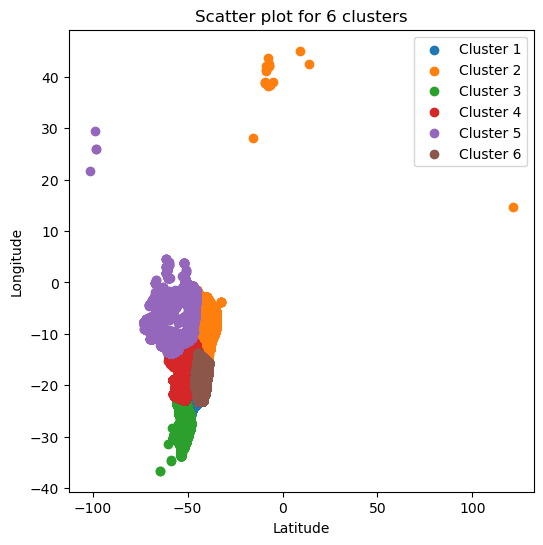

In [11]:
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# Extract latitude and longitude columns
geo_lat_lng = geo[columns_to_cluster].values

# Define a range of cluster numbers to try
cluster_range = range(2, 11)

# Iterate through the cluster range and compute inertia and silhouette score for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42,algorithm='lloyd')
    kmeans.fit(geo_lat_lng)

    # Plot data points for clusters 3 to 6
    if 3 <= k <= 6:
        plt.figure(figsize=(6, 6))
        for cluster_num in range(k):
            cluster_points = geo_lat_lng[kmeans.labels_ == cluster_num]
            plt.scatter(cluster_points[:, 1], cluster_points[:, 0], label=f'Cluster {cluster_num + 1}')
        plt.title(f'Scatter plot for {k} clusters')
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')
        plt.legend()
        plt.show()


### 3.3 Data reduction && Data transformation

#### Joining customer and geolocation dataframes with the same zip code prefix into geo_customer df. The dataframes don't share the same name which is why we used left_on, right_on to specify which feature they should match on.

In [12]:
k = 4  # Set the number of clusters

# Perform KMeans clustering with k=4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(geo[columns_to_cluster])
geo['label']=kmeans.labels_

geo_customer = pd.merge(geo, customers, left_on='geolocation_zip_code_prefix', right_on='customer_zip_code_prefix', how='inner')
geo_customer=geo_customer.drop(columns=['customer_city','customer_state','geolocation_zip_code_prefix',"geolocation_lat","geolocation_lng"])
#wont be used
geo_customer.head(10)

,label,customer_id,customer_unique_id,customer_zip_code_prefix
0,1,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,1037
1,1,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,1037
2,1,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,1037
3,1,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,1037
4,1,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,1037
5,1,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,1037
6,1,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,1037
7,1,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,1037
8,1,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,1037
9,1,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,1037


#### Merging the dataframe with orderDf  to determine the orders that each cluster made

In [13]:
customer_orders = pd.merge(geo_customer, orders, on='customer_id',how='inner')
customer_orders=customer_orders.drop(columns=['customer_unique_id',"order_estimated_delivery_date","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date"])
customer_orders = customer_orders.drop_duplicates()
customer_orders = customer_orders.reset_index(drop=True)
customer_orders.head(10)

,label,customer_id,customer_zip_code_prefix,order_id
0,1,05b005e82f3f2dcc41b5504f00484e50,1037,e260cc3baa8f4aae3fab201ef60e1127
1,1,19ee522d0dd140702062bb89e4820e19,1037,14c7dfb8e61a3df193f153c72a99a3e5
2,1,6519f59a7687a4661f7c8a7e24f28f94,1037,d4daa9ee1fe28458773297759dbfe2bc
3,1,9a02295e3381803554347ab4dc1ab41b,1046,60a7df16f9a8d8f38bd974b8a873167d
4,1,51795c9dc161dc05ef36dc8460dfa7e7,1046,5859370f19fe47ef87a4b0d110e6cf67
5,1,d9e67dbdc0e7ff5a0ccbb30c9414fbd2,1046,5b944386c869819d045c1388bb686124
6,1,e41ca8cd2c3ae3aec718fa68a2ff49d4,1046,e2a04e95ea3fda8f64fc1edeb4e04c34
7,1,fdbed455fe5a8f3029c4b4bfe8ad5500,1046,1404879b6eab59758d3d92fc8f504f98
8,1,3258445d69ee63eac4af6749b70a0305,1046,d6717d9840d700bd7be08d9ca8bb791b
9,1,7f3c2e6516da8ec689dd5729e8772c95,1046,2cef31063d49c0d832ca9bd13bbb727f


#### After dropping duplicates from customer_orders and reseting the indices of columns we will Merge customer_orders with Items Dataframe to have product_id  of items bought.

In [14]:
orders_items=pd.merge(customer_orders,items,on='order_id',how='inner')
orders_items=orders_items.drop(columns=["seller_id", "shipping_limit_date", "price" ,"freight_value","order_item_id","order_id"])
orders_items =orders_items.drop_duplicates()
orders_items= orders_items.reset_index(drop=True)
orders_items.head(10)

,label,customer_id,customer_zip_code_prefix,product_id
0,1,05b005e82f3f2dcc41b5504f00484e50,1037,d7a023eecac412d29d49735e9e9b629f
1,1,19ee522d0dd140702062bb89e4820e19,1037,e0d64dcfaa3b6db5c54ca298ae101d05
2,1,6519f59a7687a4661f7c8a7e24f28f94,1037,b2855c4e42b8a50f359904c6763eeddc
3,1,9a02295e3381803554347ab4dc1ab41b,1046,31b8e7c2a22f3dba5183cc110bdd72f7
4,1,51795c9dc161dc05ef36dc8460dfa7e7,1046,f74353ffeaa55836a3cf603a2dcd855e
5,1,d9e67dbdc0e7ff5a0ccbb30c9414fbd2,1046,700b2242828ce37313207c1e91adc2d0
6,1,e41ca8cd2c3ae3aec718fa68a2ff49d4,1046,dab2413ead0edda9967edbc9bda2a64e
7,1,fdbed455fe5a8f3029c4b4bfe8ad5500,1046,10adb53d8faa890ca7c2f0cbcb68d777
8,1,3258445d69ee63eac4af6749b70a0305,1046,7d40b684cc830baa8f7760f6fb1528c0
9,1,7f3c2e6516da8ec689dd5729e8772c95,1046,231081927a13592c84df280baf744393


### Note that we dropped order_id because we only needed the product_id only.
### We will now join orders_product with products to obtain the categories of the products and promote items in a category

In [15]:
items_products=pd.merge(orders_items,products,on='product_id',how='inner')
items_products=items_products.drop(columns=["product_name_lenght" ,"product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"])

items_products=items_products.dropna()
items_products

,label,customer_id,customer_zip_code_prefix,product_id,product_category_name
0,1,05b005e82f3f2dcc41b5504f00484e50,1037,d7a023eecac412d29d49735e9e9b629f,livros_tecnicos
1,1,1d9d8fdfda9ee5c0fbbc6b93e2ceca65,4738,d7a023eecac412d29d49735e9e9b629f,livros_tecnicos
2,1,00ba72dac5dae2776b5bfcf799a956b2,4835,d7a023eecac412d29d49735e9e9b629f,livros_tecnicos
3,1,6d41885118d1c89e00b8a67eb3e74653,5577,d7a023eecac412d29d49735e9e9b629f,livros_tecnicos
4,1,c8d36b891159ed970f8236df9eca6618,5887,d7a023eecac412d29d49735e9e9b629f,livros_tecnicos
...,...,...,...,...,...
102569,0,f93bb6c70a7306d18a24f77f1889916d,99965,1684f99c7e0e67403e52a7783366870f,automotivo
102571,0,dbfe1db80433dbb5886d4c7994ddd82b,99930,77bb7313da6b9c08c7ef73fa7f821ef4,eletrodomesticos
102572,0,2c07700e1621617464d6252aaca9f1a6,99960,577f102553175d51e571885be1347546,casa_construcao
102573,0,a841fb9010543883845d5cc513cac85f,99925,69a7ee112e7b63892ad5db80e4c3277f,market_place


### Finally, we will transform the product categories from portuguese to english

In [16]:
productCategoryName=pd.read_csv("../Data/productCategoryName.csv")
df=pd.merge(items_products,productCategoryName,on='product_category_name',how='inner')
df=df.drop(columns="product_category_name")
df

,label,customer_id,customer_zip_code_prefix,product_id,product_category_name_english
0,1,05b005e82f3f2dcc41b5504f00484e50,1037,d7a023eecac412d29d49735e9e9b629f,books_technical
1,1,1d9d8fdfda9ee5c0fbbc6b93e2ceca65,4738,d7a023eecac412d29d49735e9e9b629f,books_technical
2,1,00ba72dac5dae2776b5bfcf799a956b2,4835,d7a023eecac412d29d49735e9e9b629f,books_technical
3,1,6d41885118d1c89e00b8a67eb3e74653,5577,d7a023eecac412d29d49735e9e9b629f,books_technical
4,1,c8d36b891159ed970f8236df9eca6618,5887,d7a023eecac412d29d49735e9e9b629f,books_technical
...,...,...,...,...,...
101091,0,0fbd856ba1d4961786fb54bd448eb7fe,89675,0c800efe70e04ffcc3b266946e3e4826,la_cuisine
101092,0,c3cd86c3cbac654f8558a8286ba93c1c,90220,724c49c346d2979339d366fa59ce49de,la_cuisine
101093,0,e548277911829ffe81aac2b4407de701,92412,ea9b0b855335919945731f9368f83dc9,la_cuisine
101094,1,919570a26efbd068d6a0f66d5c5072a3,71940,8db75af9aed3315374db44d7860e25da,security_and_services


## 4. Modeling

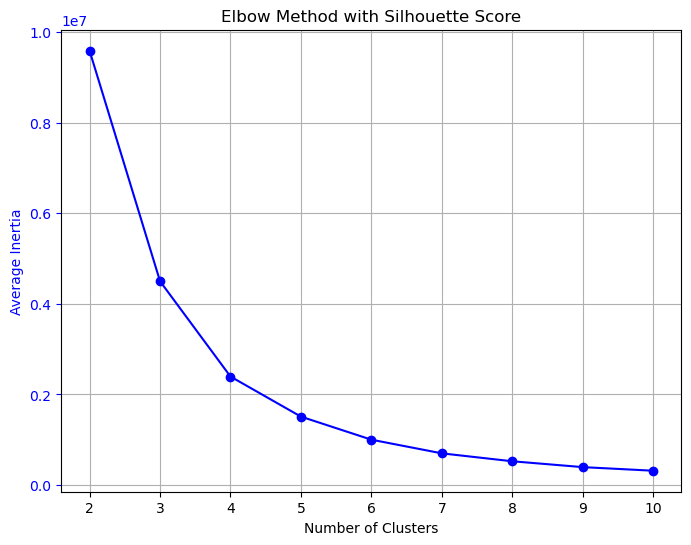

In [17]:


# Generate some example data (replace this with your actual data)

inertia = []
silhouette_scores = []

# Define a range of cluster numbers to try
cluster_range = range(2,11)

# Iterate through the cluster range and compute inertia and silhouette score for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, algorithm='lloyd', init='k-means++')
    kmeans.fit(geo[columns_to_cluster])
    inertia.append(kmeans.inertia_/k)



# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting Average Inertia
ax1.plot(cluster_range, inertia, marker='o', linestyle='-', color='b', label='Average Inertia')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Average Inertia', color='b')
ax1.tick_params('y', colors='b')


# Title and Grid
plt.title('Elbow Method with Silhouette Score')
plt.grid(True)
plt.show()


Please note that we have chosen 4 cluster which will be discussed in the Evaluation section

## 5. Evaluation
### Inertia
Inertia quantifies how internally coherent the clusters are. In other words, it <b>measures how close the data points are to their respective cluster centers</b>.
A good model is one with low inertia AND a low number of clusters.
The formula for calculating inertia is $\large\sum_{i=1}^n (Xi-Ck)^2$</br>
-n is the total number of data points</br>
-Ck is the centroid of the cluster X is assigned to</br>
However we are using <b>Average inertia</b> which shows the decrease in a clearer manner ${\large\sum_{i=1}^n (Xi-Ck)^2}/K$</br>
Where K is the number of clusters 
### Silhouette Score
The silhouette score is a metric in kmeans used that is as value ranging between -1 and 1 that determines how distinct the clusters are from each other.
A score near +1 indicates that the sample is far away from the neighboring clusters, indicating a well-defined cluster.
A score of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
A score near -1 indicates that those samples might have been assigned to the wrong cluster.
### Number of clusters 
The cluster number itself is also an evaluation metric because choosing a high number of clusters would result in overfitting. where the model captures noise and variability in the data rather than meaningful patterns. this would not help us choose a good model
####  =>A good model is obtained with low inertia and cluster number, and a high silhoutte score
### We will choose a cluster= 4 because according to the elbow method, cluster number and silhoutte score it is one of the optimal choices made

2
3
4
5
6
7
8
9
10
11


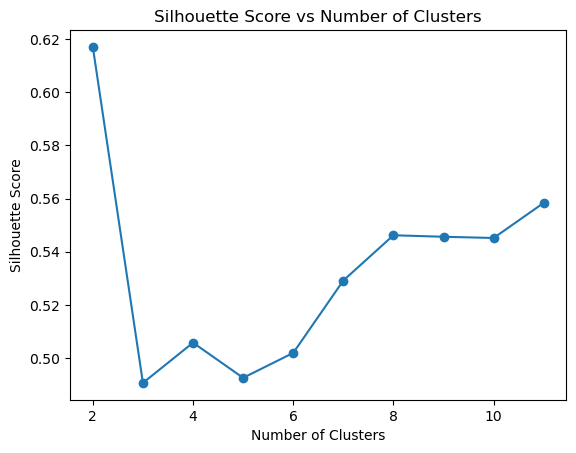

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming geo and columns_to_cluster are defined
sampled_data = geo[columns_to_cluster].sample(frac=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sampled_data)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Loop through cluster numbers from 2 to 11
for n_clusters in range(2, 12):
    print(n_clusters)
    
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


## 6. Insights, Conclusions and Business recommendations

#### We will now be checking each clusters' most bought categories to promote to the marketing team

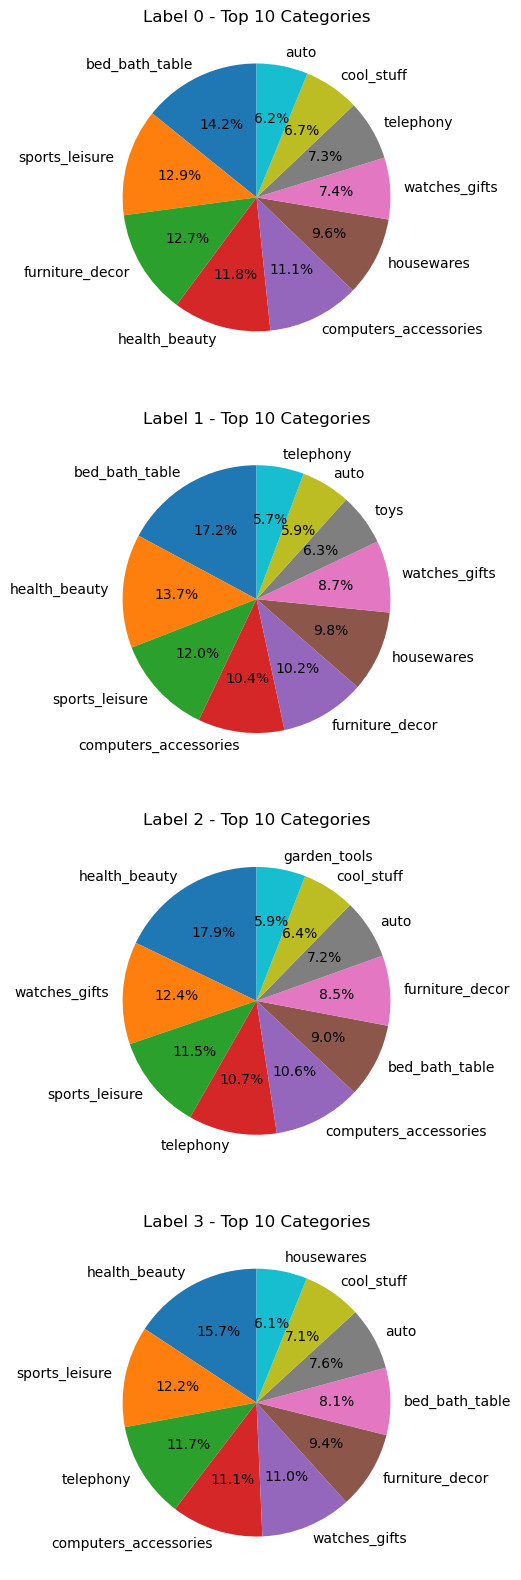

In [19]:

# Group by 'label' and 'product_category_name_english', count occurrences, and reset index
grouped_df = df.groupby(['label', 'product_category_name_english']).size().reset_index(name='count')

# Pivot the DataFrame to get 'label' as columns and 'product_category_name_english' as index
pivot_df = grouped_df.pivot(index='product_category_name_english', columns='label', values='count').fillna(0)

# Get the top 10 categories for each label
top_categories = {}
for label in pivot_df.columns:
    top_categories[label] = pivot_df[label].nlargest(10).index

# Adjust the size of the pie chart
fig, axs = plt.subplots(len(pivot_df.columns), 1, figsize=(5, 5 * len(pivot_df.columns)))  # Increase the height of the figure

# Plotting a separate pie chart for the top 10 categories for each label
for i, label in enumerate(top_categories):
    axs[i].pie(pivot_df.loc[top_categories[label], label], labels=top_categories[label], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Label {label} - Top 10 Categories')

plt.show()


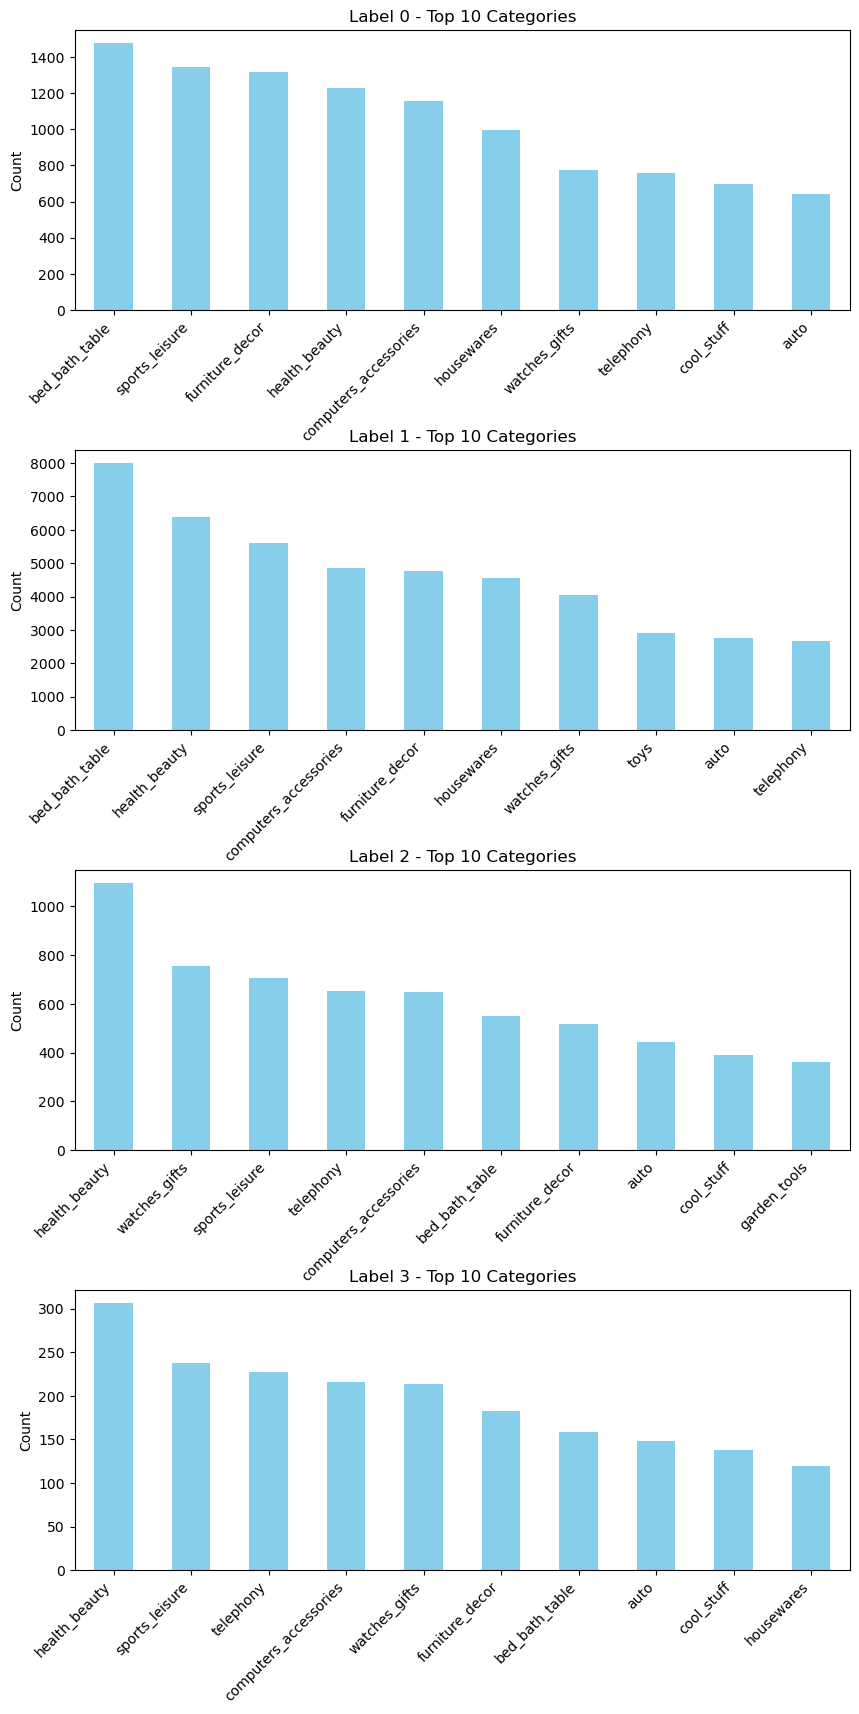

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual DataFrame you are working with

# Group by 'label' and 'product_category_name_english', count occurrences, and reset index
grouped_df = df.groupby(['label', 'product_category_name_english']).size().reset_index(name='count')

# Pivot the DataFrame to get 'label' as columns and 'product_category_name_english' as index
pivot_df = grouped_df.pivot(index='product_category_name_english', columns='label', values='count').fillna(0)

# Get the top 10 categories for each label
top_categories = {}
for label in pivot_df.columns:
    top_categories[label] = pivot_df[label].nlargest(10)

# Adjust the size of the bar chart
fig, axs = plt.subplots(len(pivot_df.columns), 1, figsize=(10, 5 * len(pivot_df.columns)))  # Increase the height of the figure

# Plotting a separate bar chart for the top 10 categories for each label
for i, label in enumerate(top_categories):
    bars = top_categories[label].plot(kind='bar', ax=axs[i], color='skyblue')
    axs[i].set_title(f'Label {label} - Top 10 Categories')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    
    # Tilt the x-axis labels
    bars.set_xticklabels(bars.get_xticklabels(), rotation=45, ha='right')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


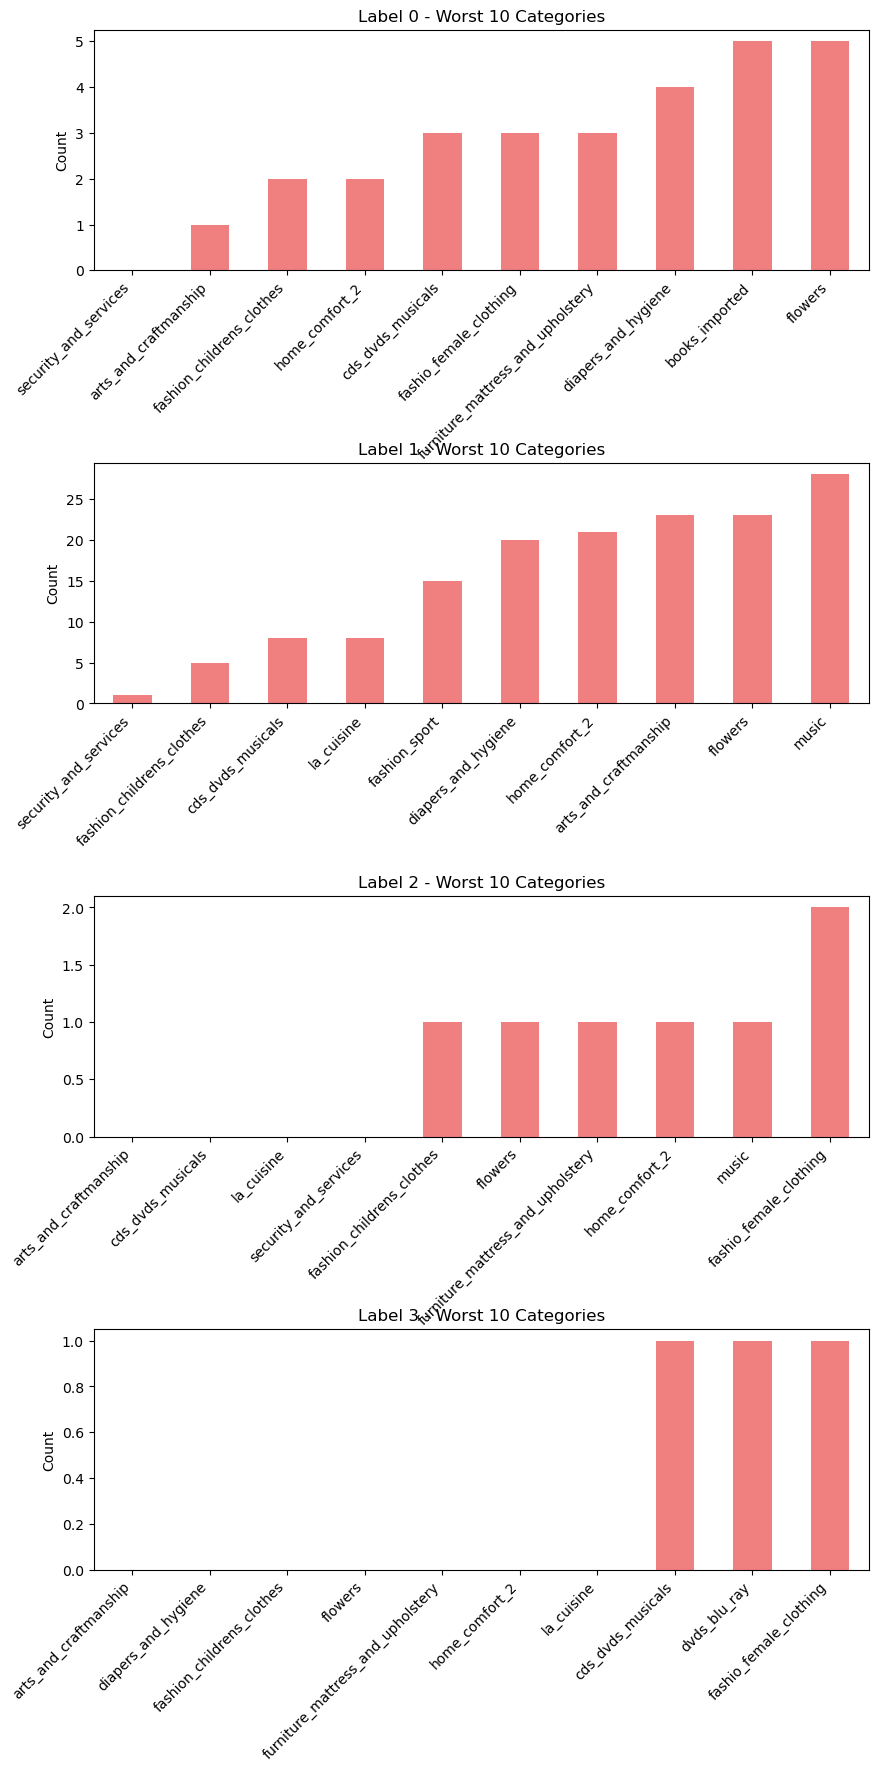

In [21]:
# Group by 'label' and 'product_category_name_english', count occurrences, and reset index
grouped_df = df.groupby(['label', 'product_category_name_english']).size().reset_index(name='count')

# Pivot the DataFrame to get 'label' as columns and 'product_category_name_english' as index
pivot_df = grouped_df.pivot(index='product_category_name_english', columns='label', values='count').fillna(0)

# Get the worst 10 categories for each label using nsmallest
worst_categories = {}
for label in pivot_df.columns:
    worst_categories[label] = pivot_df[label].nsmallest(10)

# Adjust the size of the bar chart
fig, axs = plt.subplots(len(pivot_df.columns), 1, figsize=(10, 5 * len(pivot_df.columns)))  # Increase the height of the figure

# Plotting a separate bar chart for the worst 10 categories for each label
for i, label in enumerate(worst_categories):
    bars = worst_categories[label].plot(kind='bar', ax=axs[i], color='lightcoral')
    axs[i].set_title(f'Label {label} - Worst 10 Categories')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    
    # Tilt the x-axis labels
    bars.set_xticklabels(bars.get_xticklabels(), rotation=45, ha='right')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8)

plt.show()


In [22]:
geo_customer=geo_customer.drop_duplicates()

unique_customer_counts = geo_customer.groupby('label')['customer_unique_id'].nunique().reset_index(name='unique_customer_count')

print(unique_customer_counts)


   label  unique_customer_count
0      0                  15607
1      1                  68621
2      2                   9130
3      3                   2892


  label  unique_customer_count
0     0                  15607
1     1                  68621
2     2                   9130
3     3                   2892


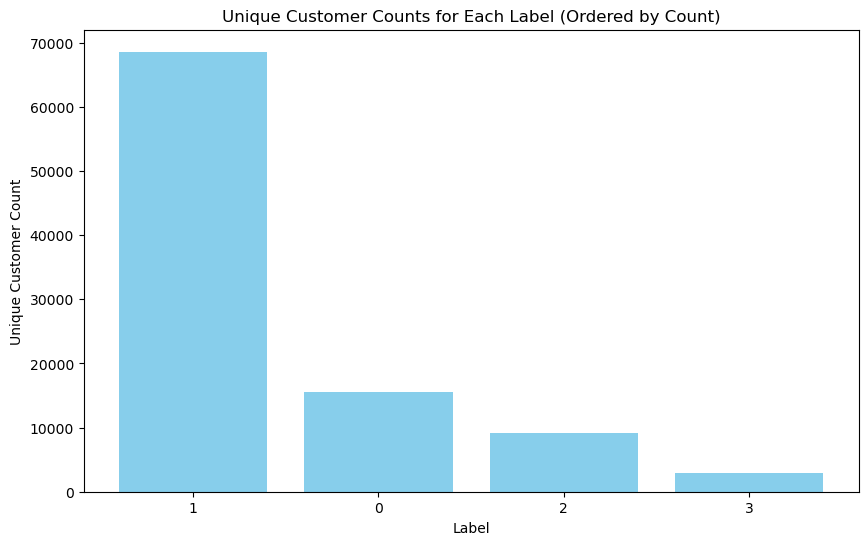

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'geo_customer' is your DataFrame
# Replace 'geo_customer' with the actual DataFrame you are working with

# Convert 'label' to categorical and specify order
label_order = [0, 1, 2, 3]
geo_customer['label'] = pd.Categorical(geo_customer['label'], categories=label_order, ordered=True)

# Group by 'label' and count the number of unique customer IDs
unique_customer_counts = geo_customer.groupby('label')['customer_unique_id'].nunique().reset_index(name='unique_customer_count')
print(unique_customer_counts)
# Convert 'label' to string for sorting purposes
unique_customer_counts['label'] = unique_customer_counts['label'].astype(str)

# Sort the labels by count in descending order
sorted_labels = unique_customer_counts.sort_values(by='unique_customer_count', ascending=False)['label']

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, unique_customer_counts.set_index('label').loc[sorted_labels, 'unique_customer_count'], color='skyblue')
plt.xlabel('Label')
plt.ylabel('Unique Customer Count')
plt.title('Unique Customer Counts for Each Label (Ordered by Count)')
plt.show()


# Through these interpretations we can deduce That,


## cluster 0
### Located in bottom of brazil
### has 15 000 customers
### Top 5 categories to keep recommending is
* Bed_bath_Table
* Sports_leisure
* Furniture_Decord
* Health_beauty
* Computer_accessories
### least bought 5 categories to improve on
* Security_and_Services
* Arts and craftmanship
* Fashion Children clothes
* Home comfort 2
* Cds Dvds and musicals

## cluster 1
### located in the heart of brazil
### has nearly 70 000 customers
### Top 5 categories to keep recommending is
* Bed_bath_Table
* Health_beauty
* Sports_leisure
* Computer_accessories
* Furniture_Decor
### least bought 5 categories to improve on
* Security_and_Services
* Fashion Children clothes
* Cds Dvds and musicals
* kitchen items
* fashion sport


## cluster 2
### located in the top left of brazil
### has nearly 9130 customers
### Top 5 categories to keep recommending is
* Health_beauty
* Watches and gifts
* Sports_leisure
* telephones
* Computer_accessories

### least bought 5 categories to improve on
* Security_and_Services
* kitchen items
* Arts and craftmanship
* Cds Dvds and musicals
* fashion children clothes

## cluster 3
### located in the top right of brazil
### has nearly 2892 customers
### Top 5 categories to keep recommending is
* Health_beauty
* Sports_leisure
* telephones
* Computer_accessories
* Watches and gifts

### least bought 5 categories to improve on
* Arts and craftmanship
* Cds Dvds and musicals
* kitchen items
* Security_and_Services
* fashion children clothes